## Обработка данных для машинного обучения

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Выбор набор данных

In [2]:
df = pd.read_csv("./data/students_performance.csv", index_col = 0)
df.head()

,gender,age,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,21.0,group B,4.0,standard,none,72,72,74
1,female,19.0,group C,2.0,standard,completed,69,90,88
2,female,19.0,group B,5.0,standard,none,90,95,93
3,male,22.0,group A,3.0,free/reduced,none,47,57,44
4,male,19.0,group C,2.0,standard,none,76,78,75


## Общая характеристика набора данных

### количество наблюдений

In [3]:
df.shape[0]

1000

### количество признаков

In [4]:
df.shape[1]

9

### предметная область и содержание признаков

#### Задача обучения заключается в классивикации успеваемости студентов исходя из различных факторов, таких как экономические, личные и социальные

###### gender - пол
###### age - возраст 
###### race/ethnicity - этническая принадлежность
###### parental level of education - уровень образования родителей (1 - школа ,  2 - колледж, 3 – специалитет, 4 - бакалавр, 5 - магистратура)
###### lunch - тип обеда получаемый студентом 
###### test preparation course - пройден ли курс подготовки к экзамену
###### math score - балл по математике (целевая переменная)
###### reading score - балл по чтению (целевая переменная)
###### writing score - балл по написанию (целевая перенная)

#### все три целевые переменные являются ранговыми с диапазон значений от 0 до 100
#### создавать 100 классов не представляется целесообразной задачей, поэтому мы будем использовать регрессию.

## Описательный анализ

#### Анализ количества и распределения отсутствующих значений

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       989 non-null    object 
 1   age                          987 non-null    float64
 2   race/ethnicity               986 non-null    object 
 3   parental level of education  987 non-null    float64
 4   lunch                        988 non-null    object 
 5   test preparation course      989 non-null    object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 78.1+ KB


В некоторых стобцах, а именно в gender, race/ethnicity, parental level of education, lunch и test preparation course отсутствуют значения

#### Исследование шкалы измерения каждого существенного признака

In [6]:
df.describe()

,age,parental level of education,math score,reading score,writing score
count,987.000000,987.000000,1000.00000,1000.000000,1000.000000
mean,20.053698,2.259372,66.08900,69.169000,68.054000
std,1.444776,1.236530,15.16308,14.600192,15.195657
min,18.000000,1.000000,0.00000,17.000000,10.000000
25%,19.000000,1.000000,57.00000,59.000000,57.750000
50%,20.000000,2.000000,66.00000,70.000000,69.000000
75%,21.000000,3.000000,77.00000,79.000000,79.000000
max,22.000000,5.000000,100.00000,100.000000,100.000000


во всех столбцах целевой переменной присутствуют нижние выбросы, верхние выбросы присутствуют только в переменной "балл по математике"

#### Построение эмпирического распределения каждого существенного признака

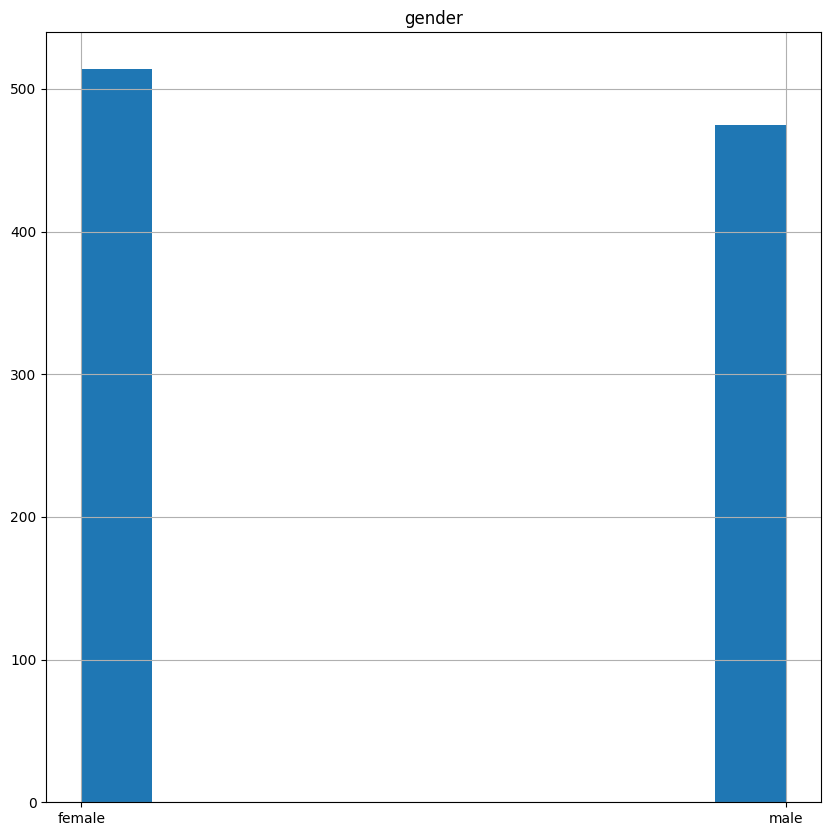

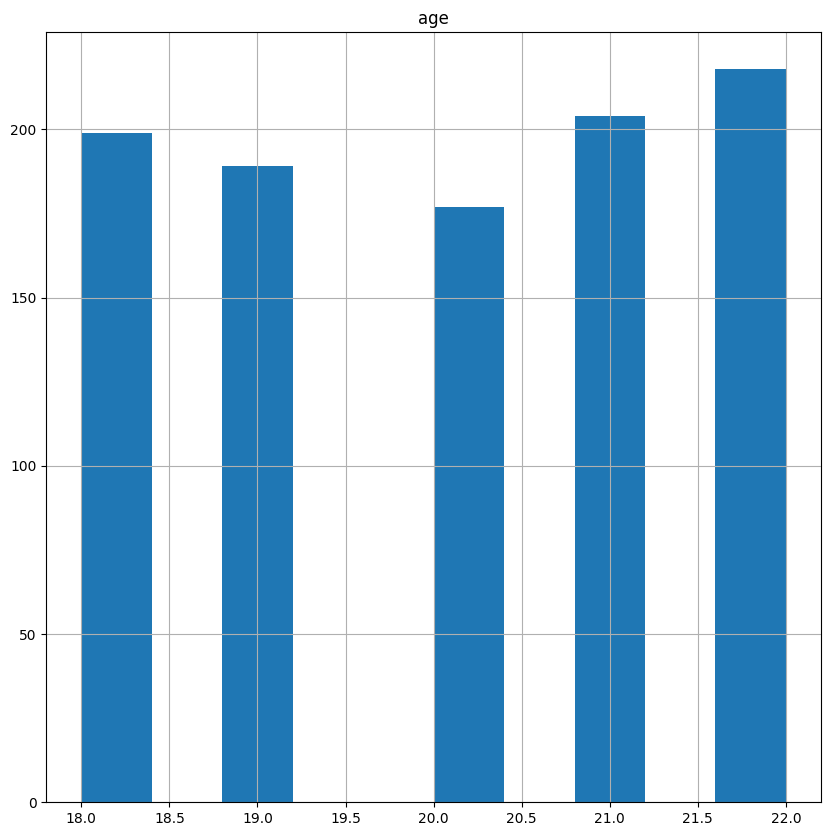

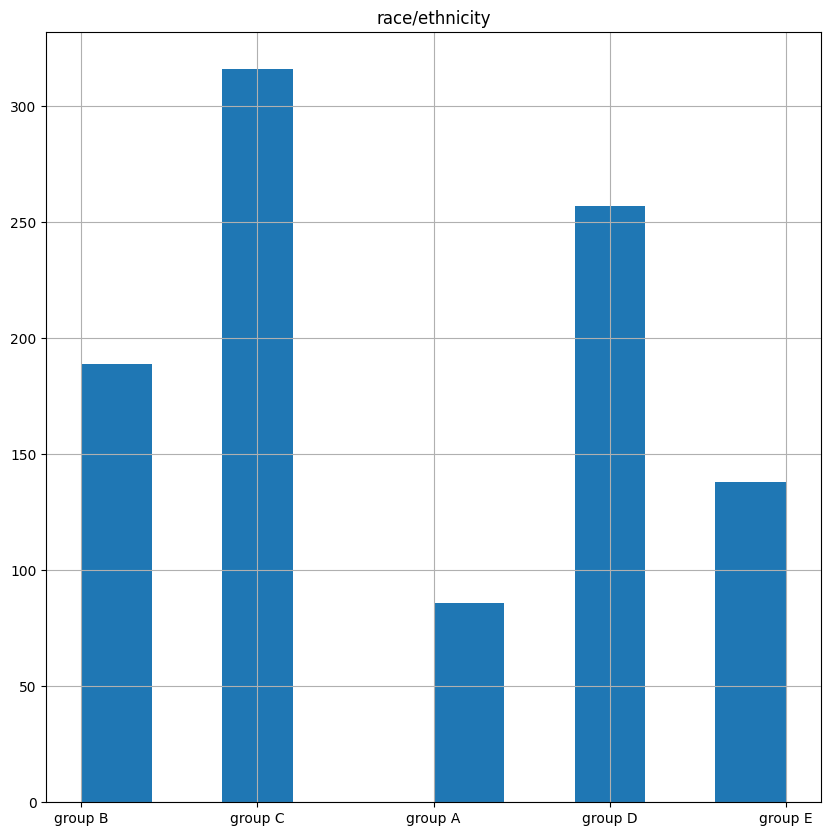

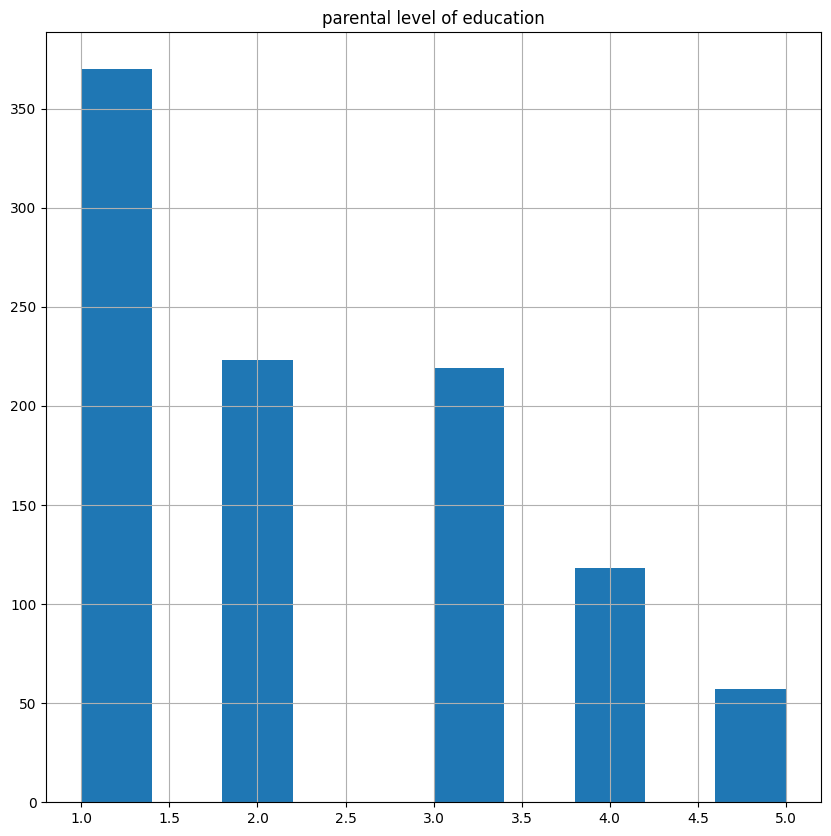

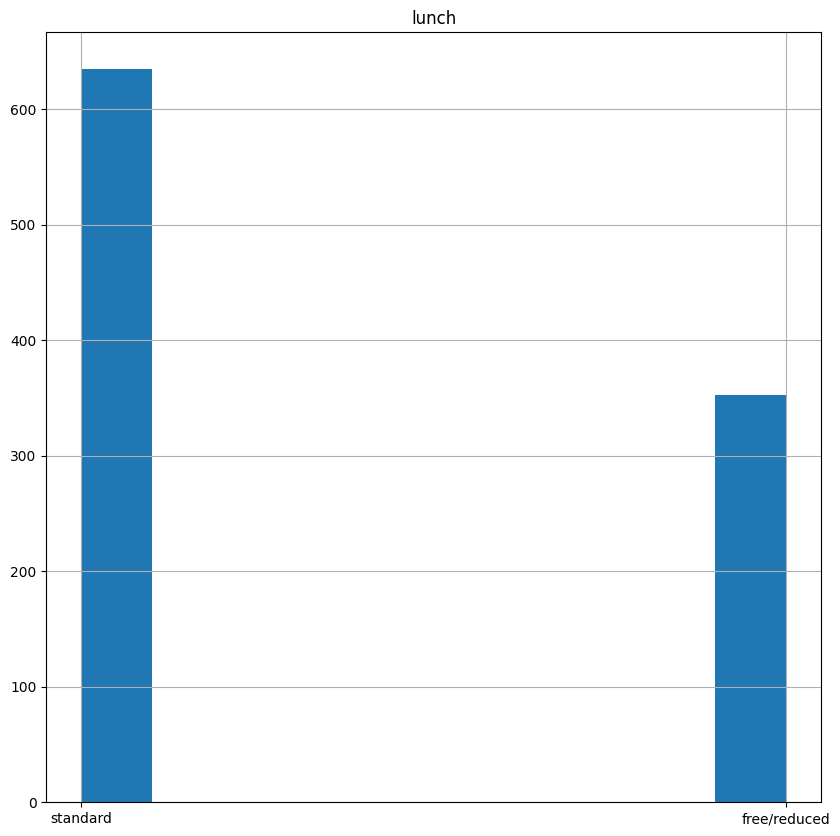

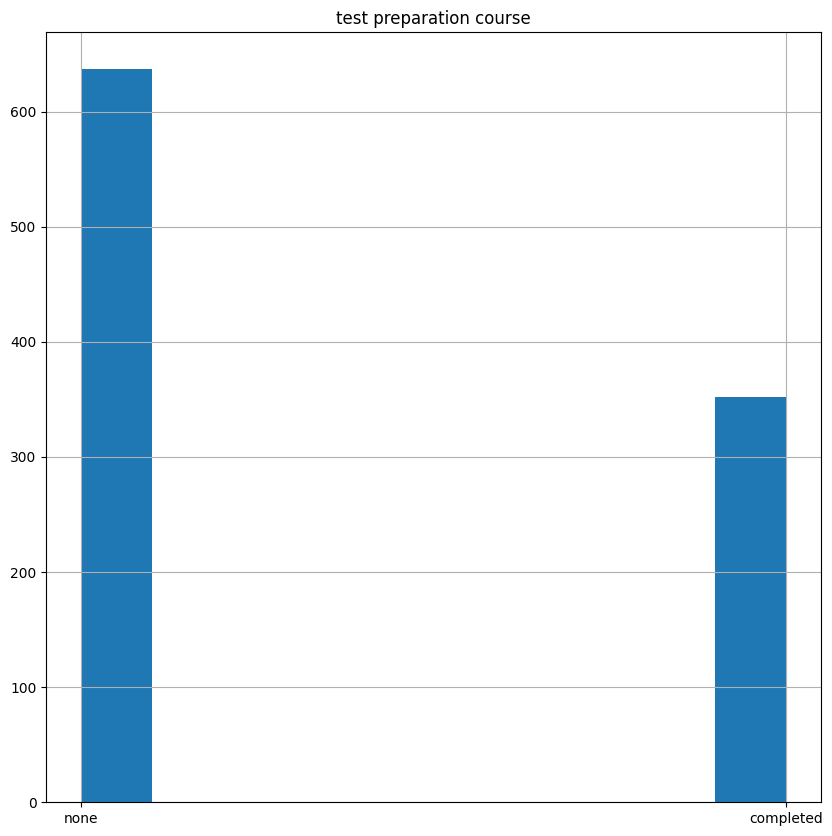

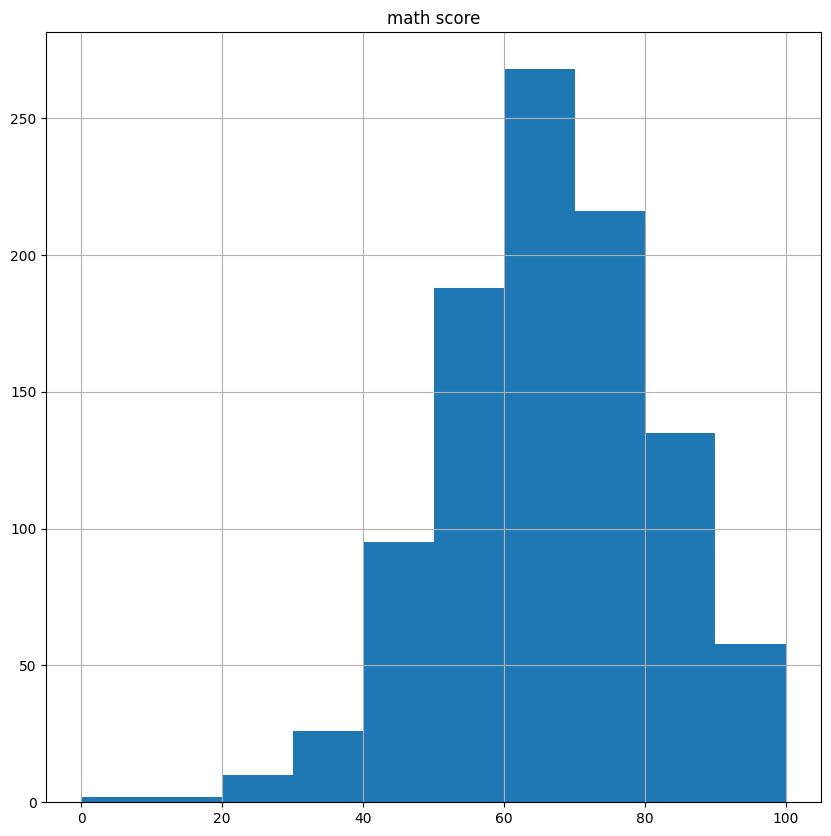

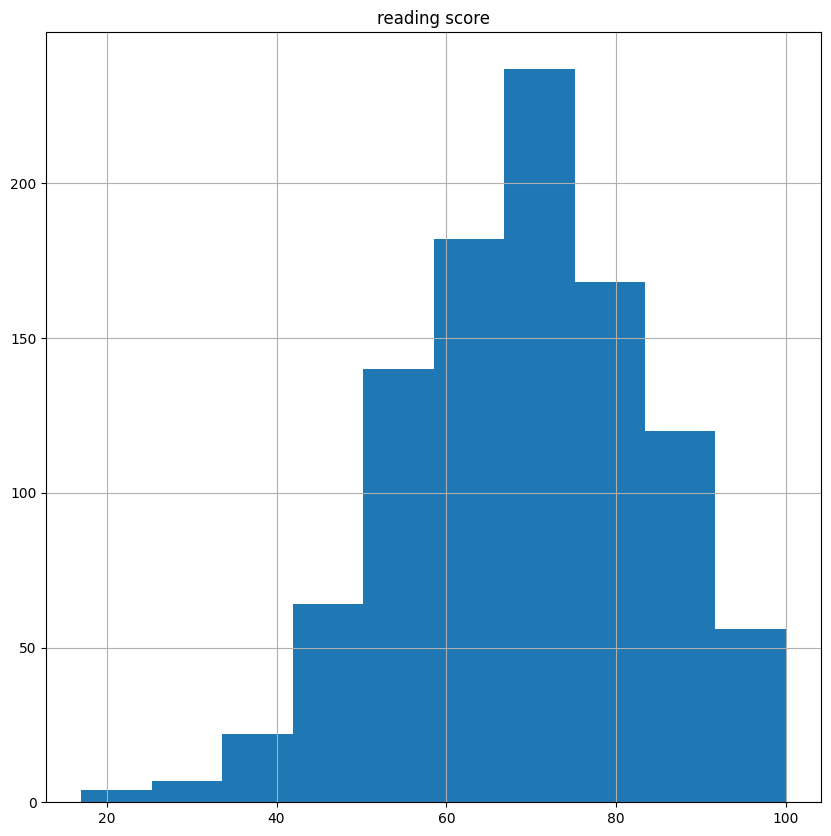

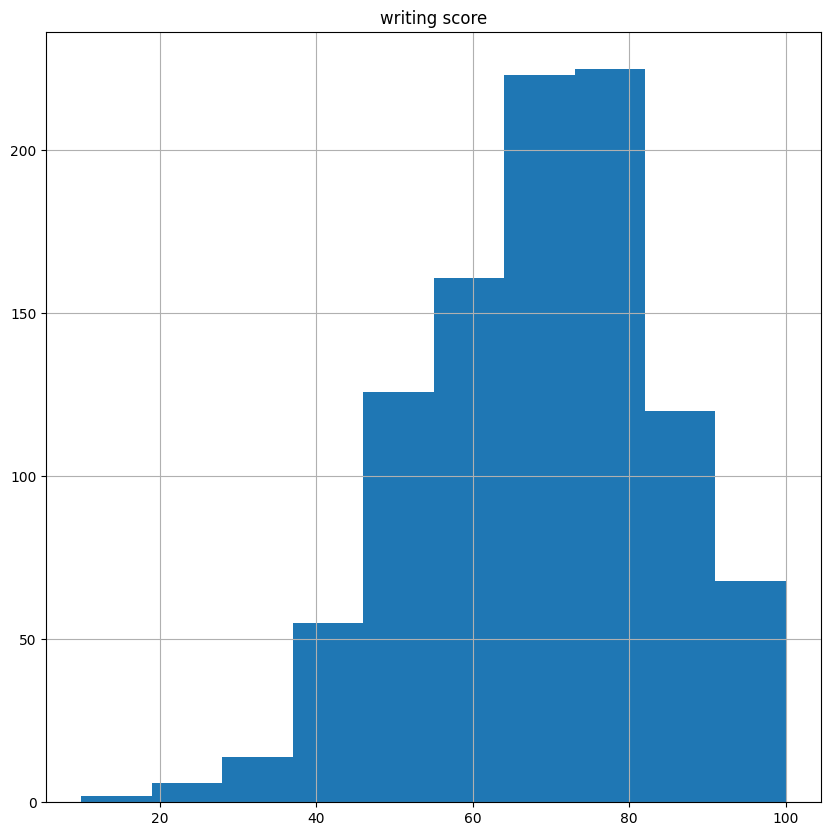

In [7]:
for col in df.columns:
    df[col].hist(figsize=(10, 10))
    plt.title(col)
    plt.show()

Распределение целевой переменной и признака age близкое к нормальному

#### Построение корреляционной матрицы

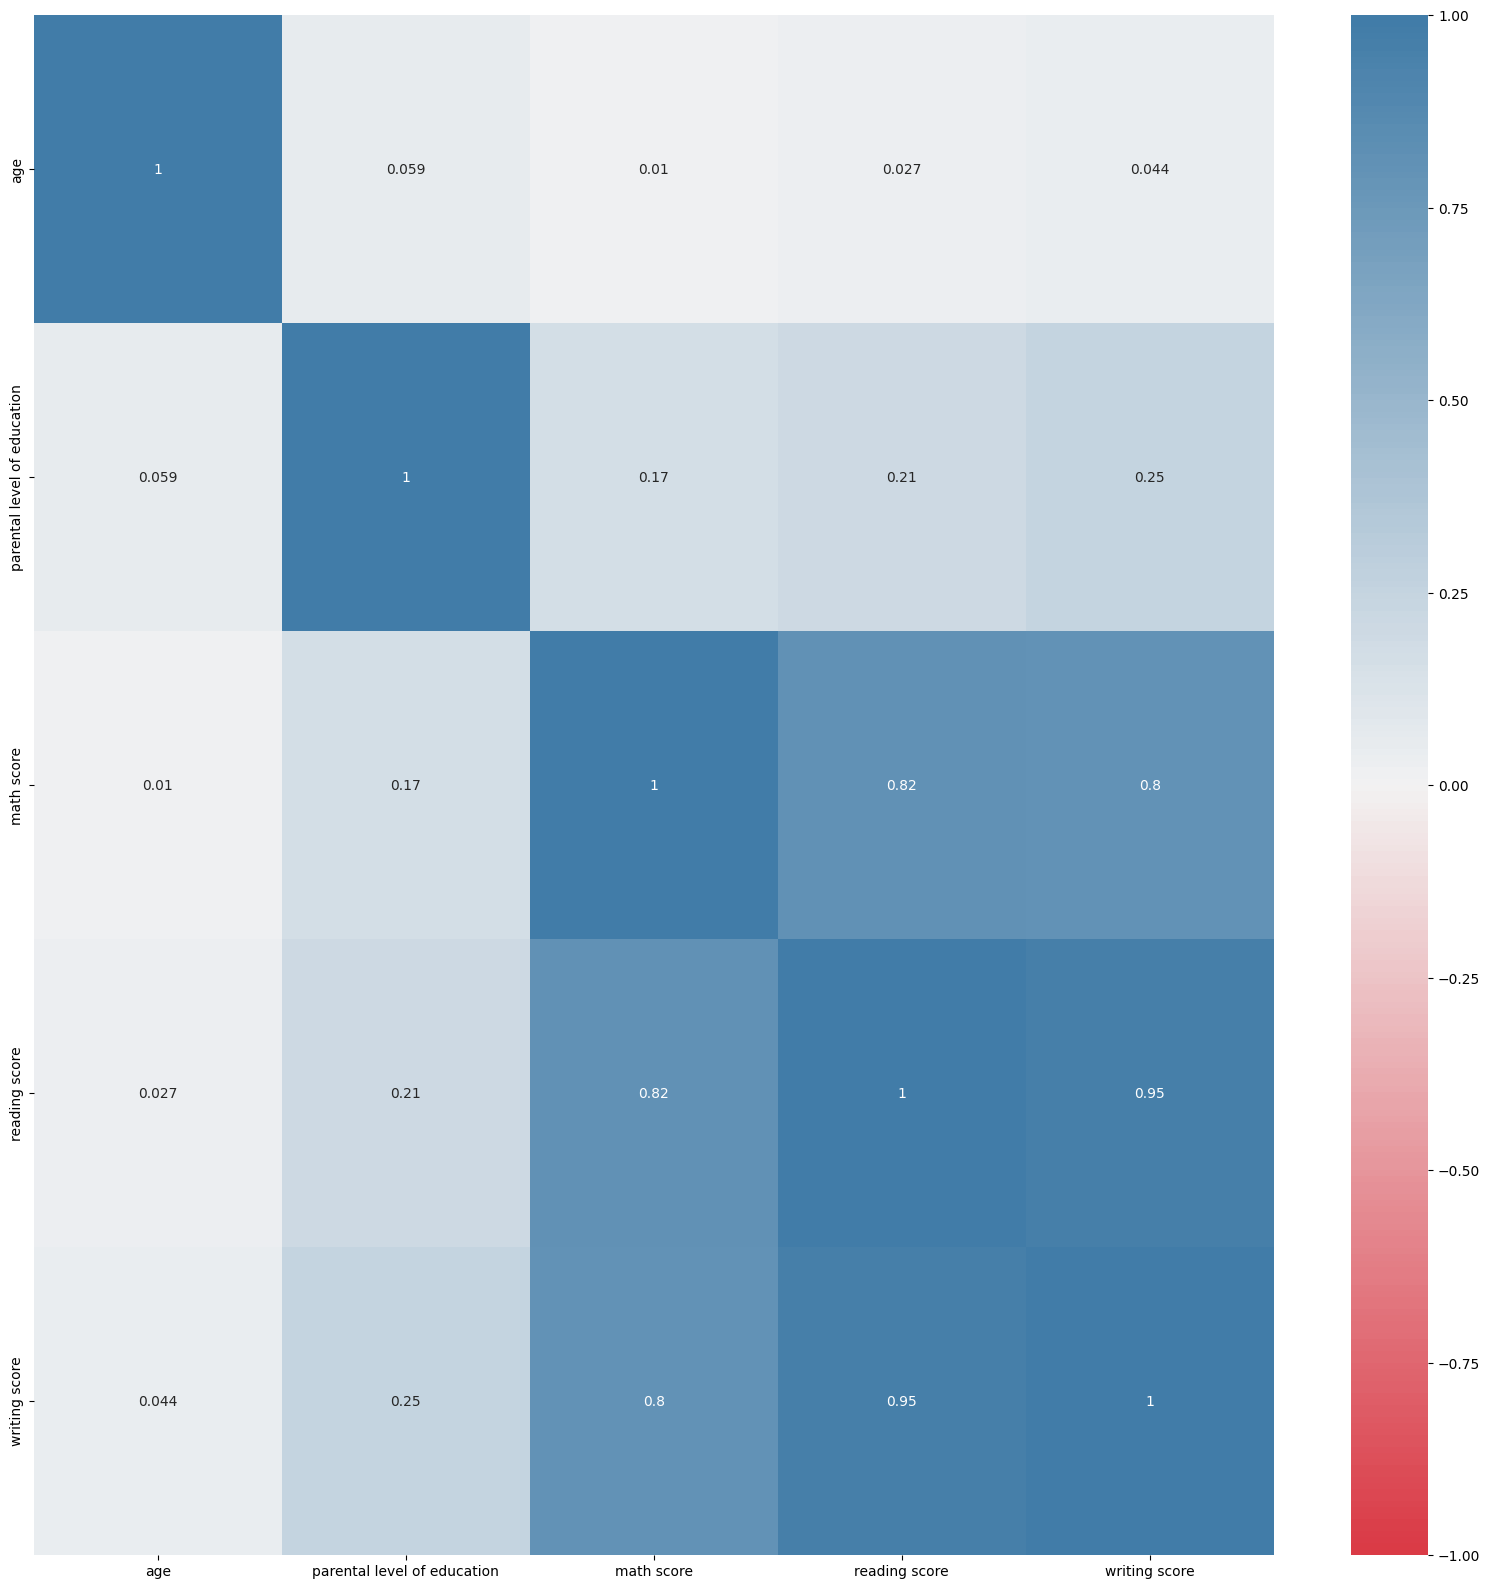

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    df.corr().round(5),
    annot=True,
    annot_kws={'size': 10},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200))
plt.show()

Высокое значение корреляции между целевыми переменными означает что ученики показывают схожие результаты по всем трем дисциплинам. Признак возраста не оказывает существенного влияния.

#### Построение совместного распределения каждого признака и целевой переменной

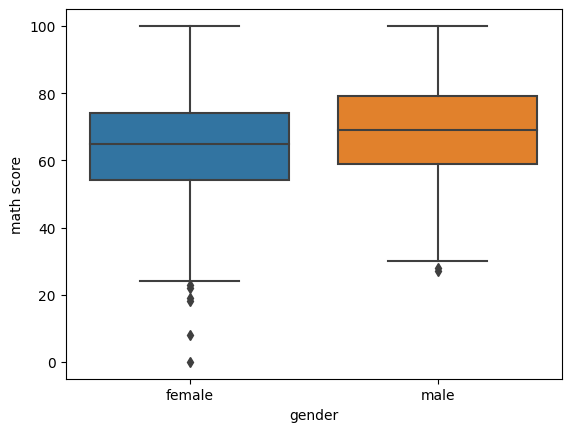

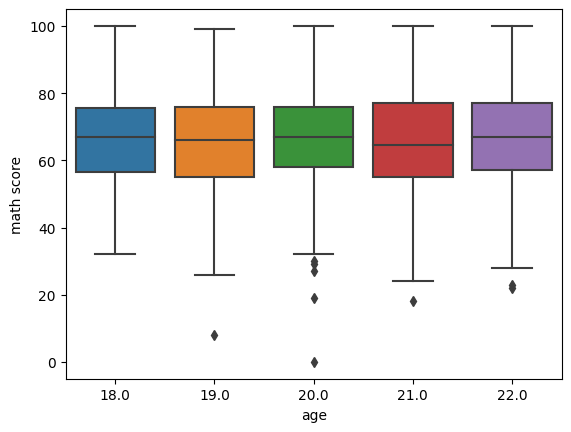

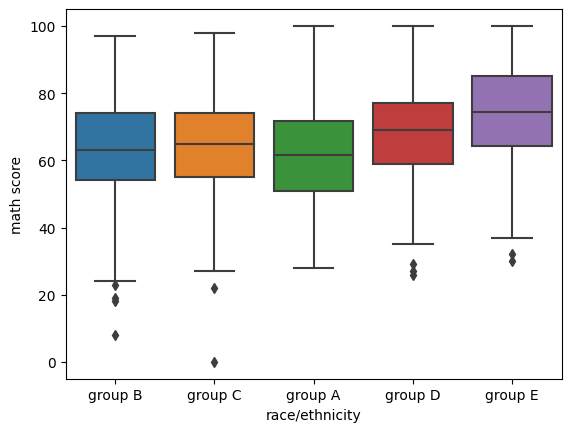

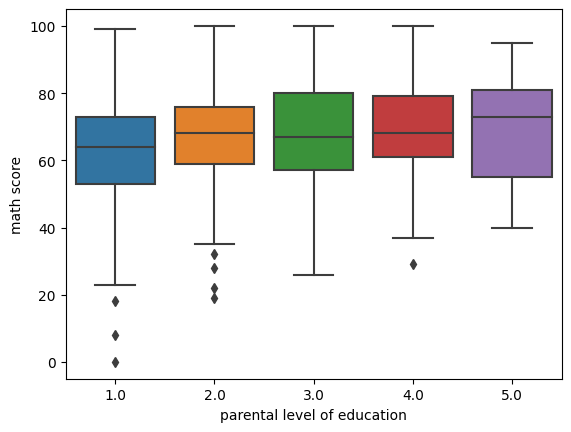

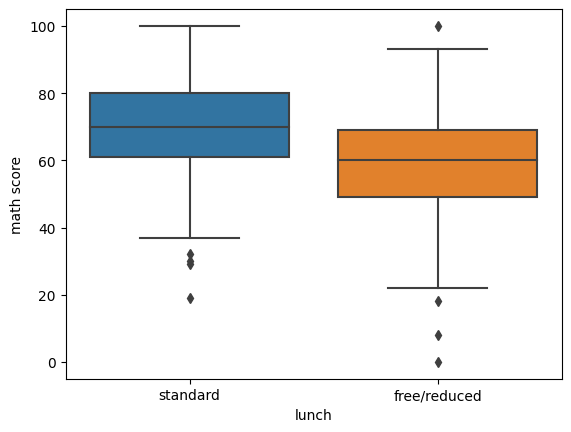

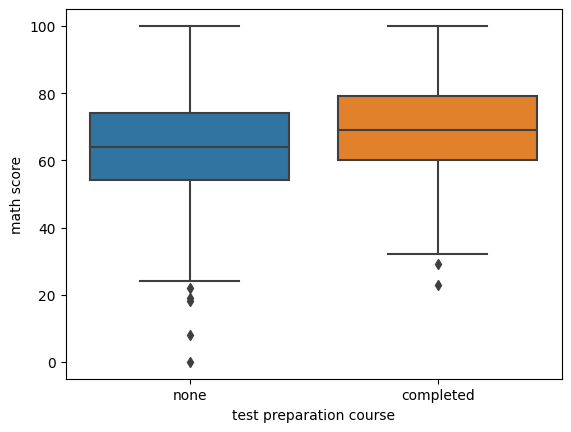

In [9]:
for col in df.columns.drop(["math score", "reading score", "writing score"]):
    ax = sns.boxplot(x=col, y="math score", data=df)
    plt.show()

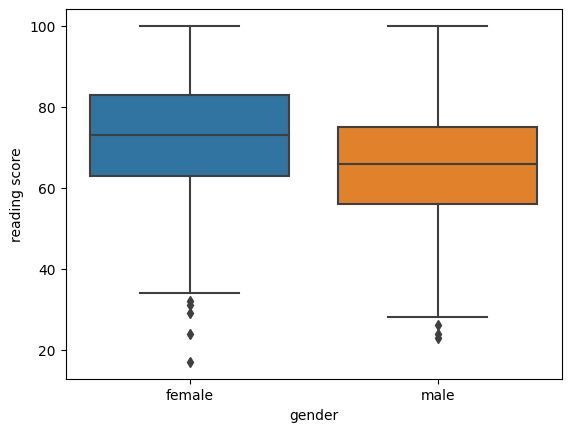

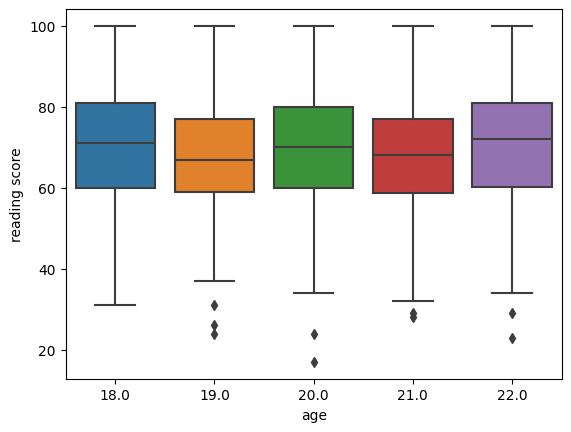

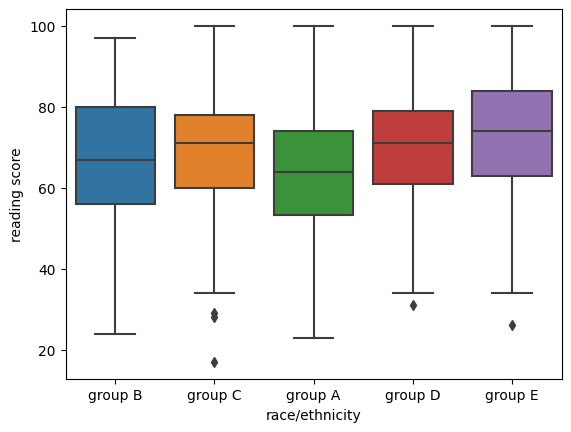

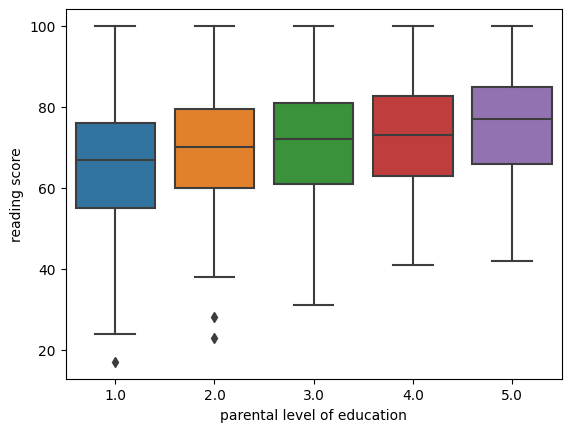

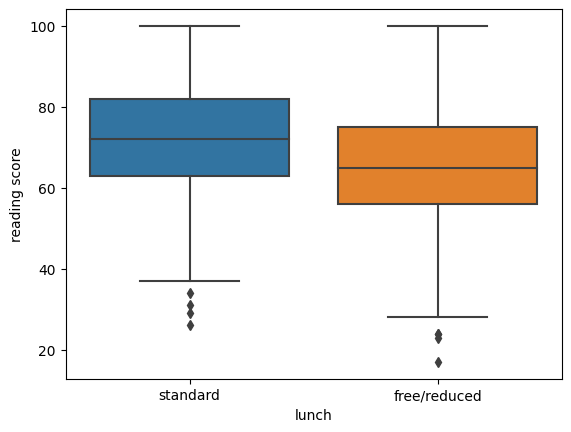

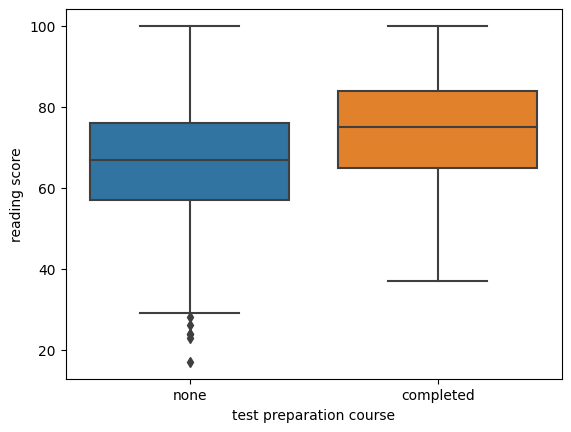

In [10]:
for col in df.columns.drop(["math score", "reading score", "writing score"]):
    ax = sns.boxplot(x=col, y="reading score", data=df)
    plt.show()

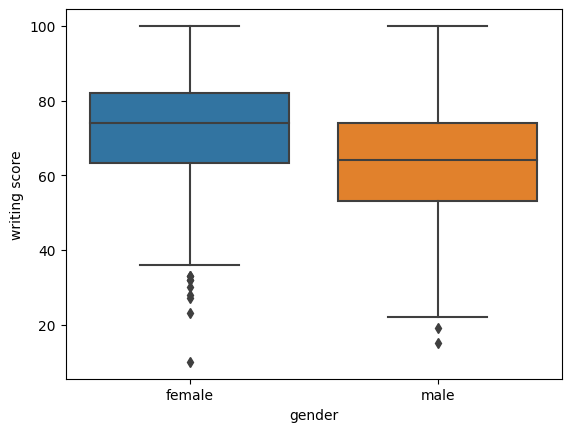

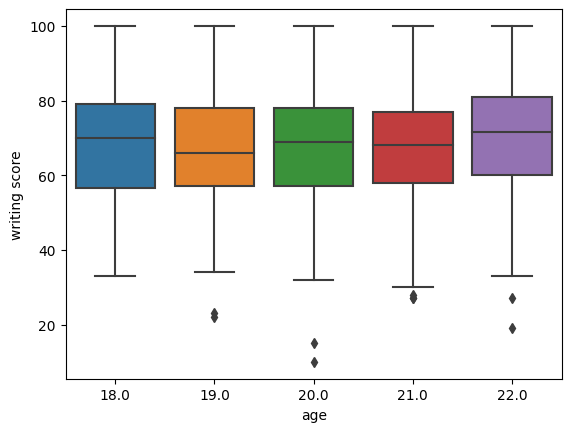

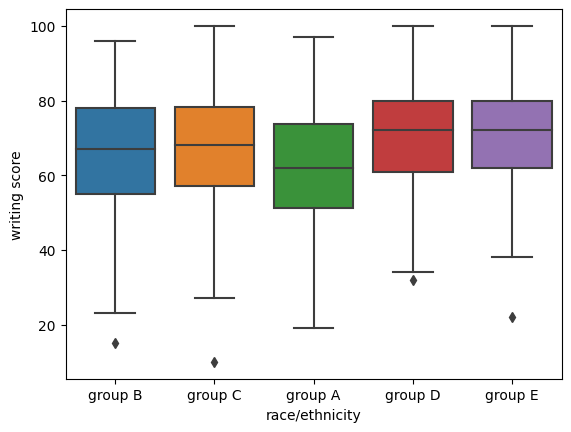

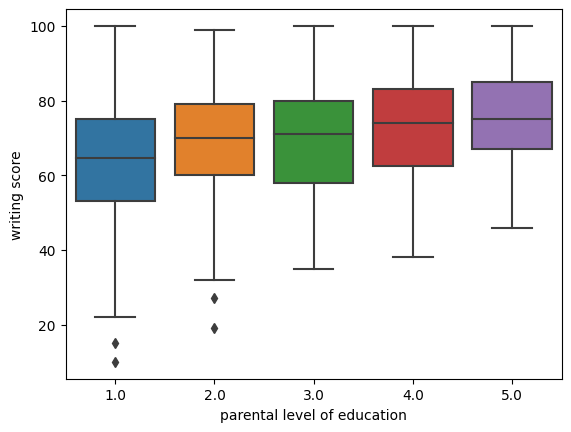

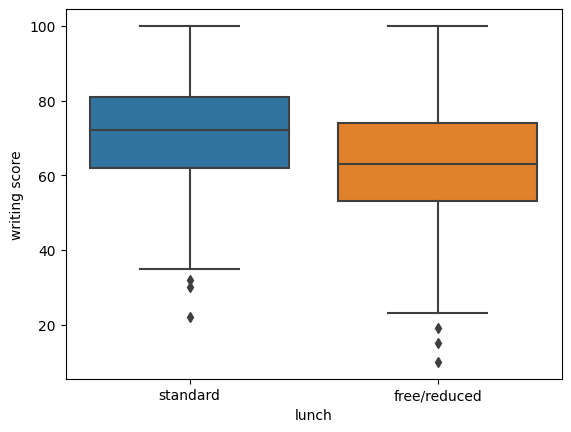

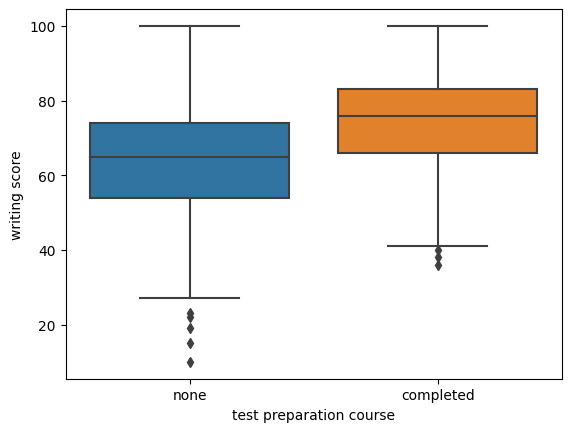

In [11]:
for col in df.columns.drop(["math score", "reading score", "writing score"]):
    ax = sns.boxplot(x=col, y="writing score", data=df)
    plt.show()

Анализируя графики можно сказать, что у мужского пола выше баллы за экзамен по математике, чем у женщин, но при этом баллы за чтение и написание у женщин выше. Признак возраста на всех целых переменных и между собой дал примерно одинаковые результаты.  По признаку рассы группа А по всем экзаменам показала худшие результаты. По графиком видно, что баллы за экзамены так же зависят от степени образования родителей (чем выше степень образования родителя, тем выше успеваемость на учебе у студента). Можно смело заявить, что студенты получающие обед бесплатно хуже сдают экзамены. Результаты студентов посещающих специальные курсы по подготовке к экзаменам заметно лучше сдали их, что ожидаемо.

### Предобработка данных

##### Удаление или заполнение отсутствующих значений

In [12]:
df_new = df.copy()

In [13]:
df_new['age'].fillna(df_new['age'].median(), inplace=True)

для возраста я взяла медиану

In [14]:
for col in df_new:
    df_new[col].fillna(df_new[col].mode()[0], inplace=True)

для остальных пропусков я взяла моду, так как это категориальные признаки

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   age                          1000 non-null   float64
 2   race/ethnicity               1000 non-null   object 
 3   parental level of education  1000 non-null   float64
 4   lunch                        1000 non-null   object 
 5   test preparation course      1000 non-null   object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 110.4+ KB


In [16]:
df_new.head()

,gender,age,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,21.0,group B,4.0,standard,none,72,72,74
1,female,19.0,group C,2.0,standard,completed,69,90,88
2,female,19.0,group B,5.0,standard,none,90,95,93
3,male,22.0,group A,3.0,free/reduced,none,47,57,44
4,male,19.0,group C,2.0,standard,none,76,78,75


##### Приведение всех признаков к бинарной либо числовой шкале

In [17]:
cols = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']

le = LabelEncoder()
df_new[cols] = df_new[cols].apply(le.fit_transform)

In [18]:
df_new.head()

,gender,age,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,21.0,1,4.0,1,1,72,72,74
1,0,19.0,2,2.0,1,0,69,90,88
2,0,19.0,1,5.0,1,1,90,95,93
3,1,22.0,0,3.0,0,1,47,57,44
4,1,19.0,2,2.0,1,1,76,78,75


##### Удаление несущественных либо избыточных признаков

In [19]:
df_new.drop("age", axis = 1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,4.0,1,1,72,72,74
1,0,2,2.0,1,0,69,90,88
2,0,1,5.0,1,1,90,95,93
3,1,0,3.0,0,1,47,57,44
4,1,2,2.0,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,5.0,1,0,88,99,95
996,1,2,1.0,0,1,62,55,55
997,0,2,1.0,0,0,59,71,65
998,0,3,2.0,1,0,68,78,77
